In [3]:
import sys
print(sys.version)

3.11.9 (tags/v3.11.9:de54cf5, Apr  2 2024, 10:12:12) [MSC v.1938 64 bit (AMD64)]


In [1]:
import pandas as pd
import numpy as np

#load data for site 1083
traffic_data = pd.read_csv('rawpvr_2018-02-01_28d_1083 TueFri.csv')


In [2]:

# Converting the 'Date' column to a datetime object for easier manipulation. coerce is used to handle inconsistent formats
traffic_data['Date'] = pd.to_datetime(traffic_data['Date'], errors='coerce')

#dropping any invlaid rows after conversion
traffic_data = traffic_data.dropna(subset=['Date'])

# Assigning 'Tuesday' or 'Friday' based on the day of the week
traffic_data['Flags'] = traffic_data['Date'].dt.dayofweek.map({1: 2, 4: 5})  # 1 is Tuesday, 4 is Friday
traffic_data['Flag Text'] = traffic_data['Date'].dt.day_name().where(traffic_data['Date'].dt.dayofweek.isin([1, 4]))


Question 5.I

In [3]:

# Filtering data for Tuesdays between 7 AM and 18:59:59 PM
filtered_data = traffic_data[
    (traffic_data['Date'].dt.dayofweek == 1) &
    (traffic_data['Date'].dt.hour >= 7) &
    (traffic_data['Date'].dt.hour <= 18) &
    (traffic_data['Date'].dt.minute <= 59) &
    (traffic_data['Date'].dt.second <= 59)
]

# Calculating the number of non-null values in 'Gap (s)'
non_null_count = filtered_data['Gap (s)'].notnull().sum()

# Calculating the total number of rows in the filtered data
total_count = filtered_data.shape[0]

# Calculating the completeness percentage
column_Completeness = (non_null_count * 100) / total_count

print("Completeness percentage", column_Completeness)

Completeness percentage 98.02568705979837


Question 5.II

Summary statistics for 'Gap (s)':
count    30503.000000
mean         4.384969
std          6.273902
min          0.006000
25%          1.400000
50%          2.268000
75%          4.249000
max         88.080000
Name: Gap (s), dtype: float64

Quantile analysis for 'Gap (s)':
0.25    1.400
0.50    2.268
0.75    4.249
Name: Gap (s), dtype: float64


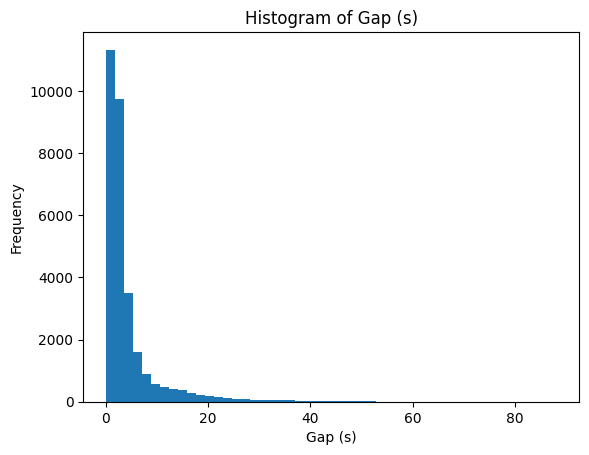

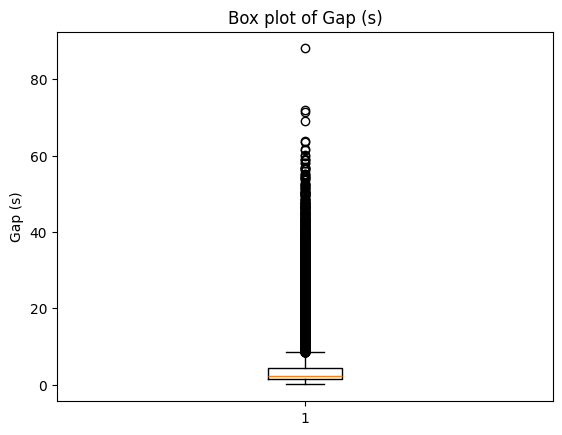

In [4]:
import matplotlib.pyplot as plt

# Filtering data for Tuesdays between 7 AM and 18:59:59 PM on 'NB_MID' lane
filtered_gap__data = traffic_data[
    (traffic_data['Date'].dt.dayofweek == 1) &
    (traffic_data['Lane Name'] == 'NB_MID') &
    (traffic_data['Direction Name'] == 'North') &
    (traffic_data['Date'].dt.hour >= 7) &
    (traffic_data['Date'].dt.hour <= 18) &
    (traffic_data['Date'].dt.minute <= 59) &
    (traffic_data['Date'].dt.second <= 59)
]

# Analyzing the 'Gap (s)' column
gap_data = filtered_gap__data['Gap (s)'].dropna()  # Remove NaN values for analysis

# Summary statistics
print("Summary statistics for 'Gap (s)':")
print(gap_data.describe())

# Quantile analysis
print("\nQuantile analysis for 'Gap (s)':")
print(gap_data.quantile([0.25, 0.5, 0.75]))

# Histogram
plt.hist(gap_data, bins=50)
plt.xlabel('Gap (s)')
plt.ylabel('Frequency')
plt.title('Histogram of Gap (s)')
plt.show()

# Box plot
plt.boxplot(gap_data)
plt.ylabel('Gap (s)')
plt.title('Box plot of Gap (s)')
plt.show()

In [5]:
filtered_gap__data.isnull().sum()

Date                0
Lane                0
Lane Name           0
Direction           0
Direction Name      0
Speed (mph)         1
Headway (s)       256
Gap (s)           619
Flags               0
Flag Text           0
dtype: int64

Question 5.III

In [7]:
filtered_gap__data['Gap (s)'] = filtered_gap__data['Gap (s)'].fillna(filtered_gap__data['Gap (s)'].median())

C:\Users\salij\AppData\Local\Temp\ipykernel_22812\1373489670.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_gap__data['Gap (s)'] = filtered_gap__data['Gap (s)'].fillna(filtered_gap__data['Gap (s)'].median())


In [8]:
filtered_gap__data

,Date,Lane,Lane Name,Direction,Direction Name,Speed (mph),Headway (s),Gap (s),Flags,Flag Text
68517,2018-02-06 07:00:01.160,2,NB_MID,1,North,27.962,1.720,2.268,2,Tuesday
68521,2018-02-06 07:00:04.020,2,NB_MID,1,North,27.962,1.520,0.856,2,Tuesday
68524,2018-02-06 07:00:05.020,2,NB_MID,1,North,29.205,1.226,0.680,2,Tuesday
68529,2018-02-06 07:00:07.020,2,NB_MID,1,North,29.825,2.137,1.694,2,Tuesday
68537,2018-02-06 07:00:10.080,2,NB_MID,1,North,27.340,3.150,2.270,2,Tuesday
...,...,...,...,...,...,...,...,...,...,...
496007,2018-02-27 18:58:50.060,2,NB_MID,1,North,36.661,4.881,5.082,2,Tuesday
496010,2018-02-27 18:58:51.060,2,NB_MID,1,North,35.417,1.200,0.725,2,Tuesday
496029,2018-02-27 18:59:26.080,2,NB_MID,1,North,41.010,35.200,34.941,2,Tuesday
496050,2018-02-27 18:59:48.040,2,NB_MID,1,North,34.798,22.600,22.382,2,Tuesday


Question 6.I

In [9]:
#load data fir site 1415
site_1415_data = pd.read_csv('rawpvr_2018-02-01_28d_1415 TueFri.csv')
site_1415_data

,Date,Lane,Lane Name,Direction,Direction Name,Speed (mph),Headway (s),Gap (s),Flags,Flag Text
0,2018-02-02 00:00:01.030000,3,SW,2,SouthWest,26.098,NaN,NaN,0,NaN
1,2018-02-02 00:00:03.090000,3,SW,2,SouthWest,34.176,1.636,1.171,0,NaN
2,2018-02-02 00:00:37.090000,3,SW,2,SouthWest,24.855,NaN,NaN,0,NaN
3,2018-02-02 00:00:40.090000,3,SW,2,SouthWest,36.661,2.380,2.523,0,NaN
4,2018-02-02 00:00:41.080000,2,NE_OS,1,NorthEast,16.155,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...
289073,2018-02-27 23:59:10.010000,3,SW,2,SouthWest,44.739,26.800,25.880,0,NaN
289074,2018-02-27 23:59:15.090000,3,SW,2,SouthWest,46.602,4.800,4.465,0,NaN
289075,2018-02-27 23:59:27.070000,3,SW,2,SouthWest,37.903,11.800,11.598,0,NaN
289076,2018-02-27 23:59:29.070000,3,SW,2,SouthWest,36.661,2.410,1.711,0,NaN


In [10]:
site_1415_data.isnull().sum()

Date                   0
Lane                   0
Lane Name              0
Direction              0
Direction Name         0
Speed (mph)            7
Headway (s)         5058
Gap (s)             8381
Flags                  0
Flag Text         289078
dtype: int64

In [11]:
# Converting the 'Date' column to a datetime object for easier manipulation. coerce is used to handle inconsistent formats
site_1415_data['Date'] = pd.to_datetime(site_1415_data['Date'], errors='coerce')

#dropping any invlaid rows after conversion
site_1415_data = site_1415_data.dropna(subset=['Date'])

# Assigning 'Tuesday' or 'Friday' based on the day of the week
site_1415_data['Flags'] = site_1415_data['Date'].dt.dayofweek.map({1: 2, 4: 5})  # 1 is Tuesday, 4 is Friday
site_1415_data['Flag Text'] = site_1415_data['Date'].dt.day_name().where(site_1415_data['Date'].dt.dayofweek.isin([1, 4]))

C:\Users\salij\AppData\Local\Temp\ipykernel_22812\4220108075.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  site_1415_data['Flags'] = site_1415_data['Date'].dt.dayofweek.map({1: 2, 4: 5})  # 1 is Tuesday, 4 is Friday
C:\Users\salij\AppData\Local\Temp\ipykernel_22812\4220108075.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  site_1415_data['Flag Text'] = site_1415_data['Date'].dt.day_name().where(site_1415_data['Date'].dt.dayofweek.isin([1, 4]))


In [12]:
site_1415_data.dtypes

Date              datetime64[ns]
Lane                       int64
Lane Name                 object
Direction                  int64
Direction Name            object
Speed (mph)              float64
Headway (s)              float64
Gap (s)                  float64
Flags                      int64
Flag Text                 object
dtype: object

In [14]:
site_1415_data['Direction Name'].nunique()

2

In [20]:
def filter_data_for_time_period(data):
    return data[
        (data['Date'].dt.dayofweek == 4) &         # Filtering for Friday (dayofweek == 4)
        ((data['Direction Name'] == 'North') |     # Filtering for North lanes
         (data['Direction Name'] == 'NorthEast'))  # filtering for NorthEast lanes on site 1415 data 
        & (data['Date'].dt.hour == 17)             # Filtering for 17:00 to 17:59
    ]



In [21]:
# Filtering both datasets for the relevant time period
site_1083_filtered = filter_data_for_time_period(traffic_data)
site_1415_filtered = filter_data_for_time_period(site_1415_data)

In [25]:
# Calculating the number of non-null values in 'Gap (s)'
non_null_count = site_1083_filtered['Speed (mph)'].notnull().sum()

# Calculating the total number of rows in the filtered data
total_count = site_1083_filtered.shape[0]

# Calculating the completeness percentage
column_Completeness = (non_null_count * 100) / total_count

print("Completeness percentage", column_Completeness)

Completeness percentage 100.0


In [26]:
# Calculating the number of non-null values in 'Gap (s)'
non_null_count = site_1415_filtered['Speed (mph)'].notnull().sum()

# Calculating the total number of rows in the filtered data
total_count = site_1415_filtered.shape[0]

# Calculating the completeness percentage
column_Completeness = (non_null_count * 100) / total_count

print("Completeness percentage", column_Completeness)

Completeness percentage 100.0


In [22]:
#Calculating the average speed for both sites
avg_speed_1083 = site_1083_filtered['Speed (mph)'].mean()
avg_speed_1415 = site_1415_filtered['Speed (mph)'].mean()

In [23]:
avg_speed_1083

27.903017853182526

In [24]:
avg_speed_1415

25.540765285996056

In [19]:
total_speed = (avg_speed_1083 + avg_speed_1415) / 2  # Taking a simple average
total_speed_kmh = total_speed * 1.60934              # Converting mph to km/h

#Estimating Journey Time (JT) in hours
distance_km = 4.86  # Distance between site 1083 and site 1415 in km
jt_hours = distance_km / total_speed_kmh             # JT in hours

#Converting JT to minutes
jt_minutes = jt_hours * 60


print(f"Estimated Journey Time (JT): {jt_minutes:.2f} minutes")

Estimated Journey Time (JT): 6.78 minutes
